<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/exercise_gapminder_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gapminder

Explained variance ratio: [0.55957043 0.33590449]

PC1 loadings:
 gdpPercap    0.707405
lifeExp      0.706757
pop         -0.008511
dtype: float64

Corr(PC1, feature):
  lifeExp → 0.916
  gdpPercap → 0.917
  pop     → -0.011


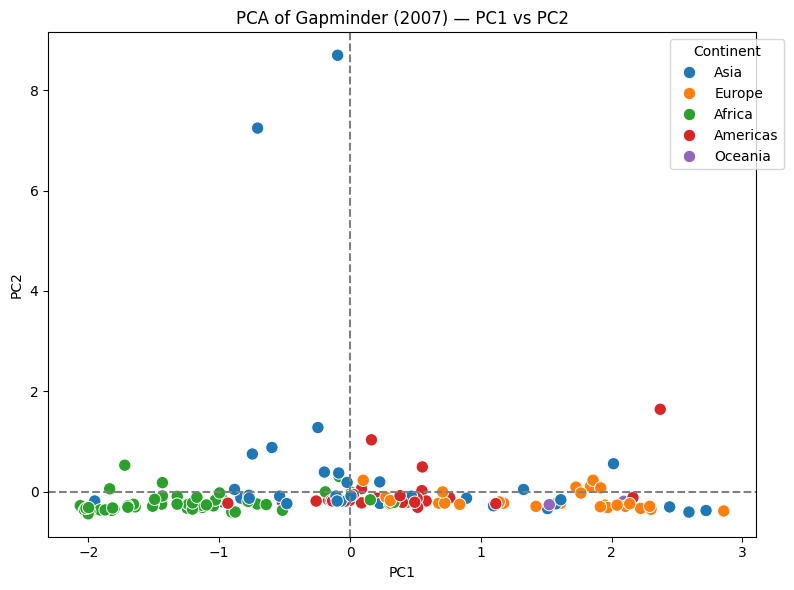

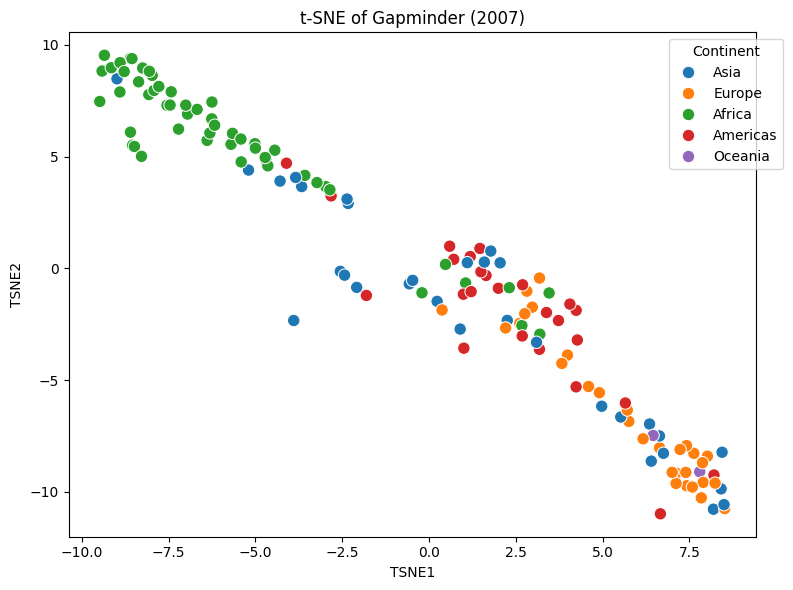

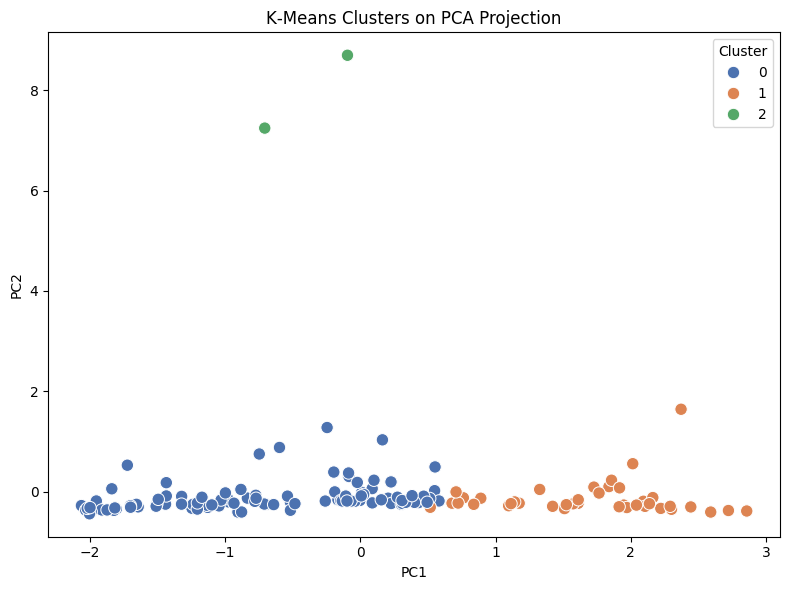

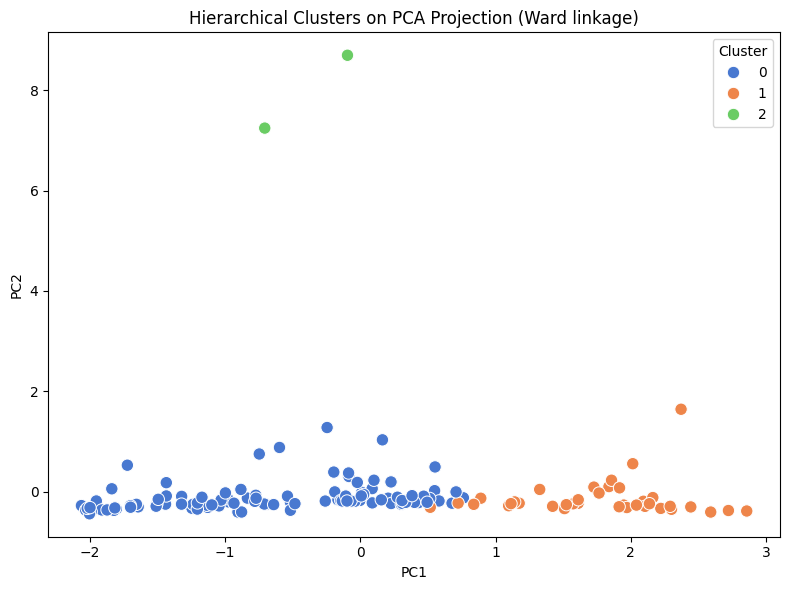


Mean PC1 by K-Means cluster:
kmeans_cluster
0   -0.667029
2   -0.400896
1    1.687618
Name: PC1, dtype: float64

Mean PC1 by Hierarchical cluster:
hc_cluster
0   -0.626747
2   -0.400896
1    1.766399
Name: PC1, dtype: float64


In [3]:
# ===== 1. Setup & Data Loading =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# Load gapminder (you may need to `pip install gapminder` or fetch from a CSV)
from gapminder import gapminder
# Filter to a single year for simplicity
df = gapminder[gapminder.year == 2007].copy()
df.reset_index(drop=True, inplace=True)

# ===== 2. Feature Selection =====
# We choose:
#   - lifeExp: life expectancy at birth
#   - gdpPercap: GDP per capita (USD)
#   - pop:     total population
features = ['lifeExp', 'gdpPercap', 'pop']
X = df[features]

# ===== 3. Preprocessing =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 4. PCA =====
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
df['PC1'] = pcs[:, 0]
df['PC2'] = pcs[:, 1]

# How much variance each PC explains?
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Check correlation of PC1 with original features
corrs = pd.Series(pca.components_[0], index=features).sort_values(ascending=False)
print("\nPC1 loadings:\n", corrs)

# Correlation coefficients:
print("\nCorr(PC1, feature):")
for feat in features:
    print(f"  {feat:7s} → {np.corrcoef(df['PC1'], df[feat])[0,1]:.3f}")

# ===== 5. Plot PCA results =====
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='continent', s=80)
plt.title("PCA of Gapminder (2007) — PC1 vs PC2")
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(bbox_to_anchor=(1.05,1), title='Continent')
plt.tight_layout()
plt.show()

# ===== 6. t-SNE Embedding =====
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
tsne_emb = tsne.fit_transform(X_scaled)
df['TSNE1'], df['TSNE2'] = tsne_emb[:,0], tsne_emb[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='continent', s=80)
plt.title("t-SNE of Gapminder (2007)")
plt.legend(bbox_to_anchor=(1.05,1), title='Continent')
plt.tight_layout()
plt.show()

# ===== 7. K‑Means Clustering =====
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='kmeans_cluster', palette='deep', s=80)
plt.title("K‑Means Clusters on PCA Projection")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ===== 8. Hierarchical Clustering =====
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['hc_cluster'] = hc.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='hc_cluster', palette='muted', s=80)
plt.title("Hierarchical Clusters on PCA Projection (Ward linkage)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ===== 9. Compare Cluster Centroids & PC1 Means =====
print("\nMean PC1 by K-Means cluster:")
print(df.groupby('kmeans_cluster')['PC1'].mean().sort_values())
print("\nMean PC1 by Hierarchical cluster:")
print(df.groupby('hc_cluster')['PC1'].mean().sort_values())


In [4]:
import pandas as pd

# Download Gapminder data (or use seaborn's built-in version)
url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
gap = pd.read_csv(url)

print(gap.head())


       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


In [5]:
features = ['lifeExp', 'gdpPercap']
X = gap[features]
print(X.describe())

           lifeExp      gdpPercap
count  1704.000000    1704.000000
mean     59.474439    7215.327081
std      12.917107    9857.454543
min      23.599000     241.165876
25%      48.198000    1202.060309
50%      60.712500    3531.846988
75%      70.845500    9325.462346
max      82.603000  113523.132900


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratios:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)
gap['PC1'] = X_pca[:, 0]
gap['PC2'] = X_pca[:, 1]

Explained variance ratios: [0.79185311 0.20814689]
PCA components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


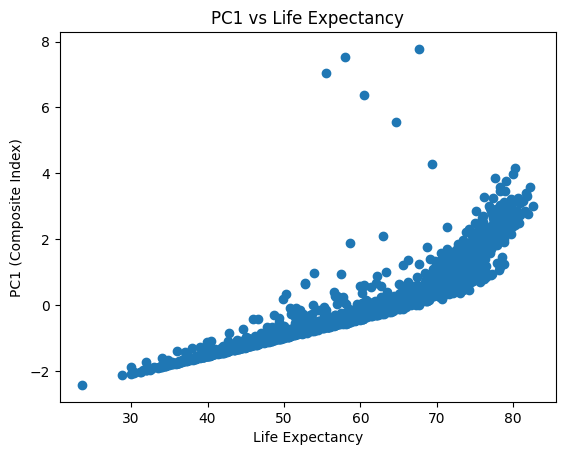

In [8]:
import matplotlib.pyplot as plt

plt.scatter(gap['lifeExp'], gap['PC1'])
plt.xlabel('Life Expectancy')
plt.ylabel('PC1 (Composite Index)')
plt.title('PC1 vs Life Expectancy')
plt.show()

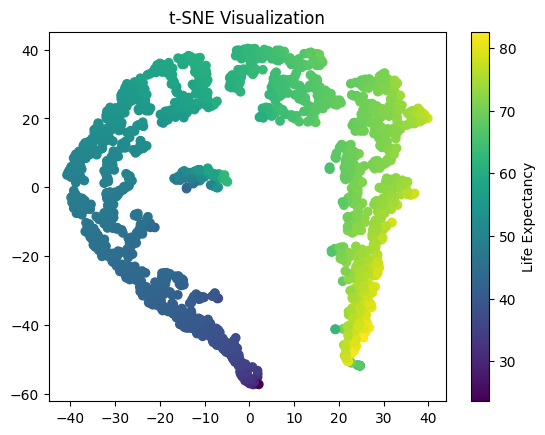

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
gap['TSNE1'] = X_tsne[:, 0]
gap['TSNE2'] = X_tsne[:, 1]

plt.scatter(gap['TSNE1'], gap['TSNE2'], c=gap['lifeExp'], cmap='viridis')
plt.colorbar(label='Life Expectancy')
plt.title('t-SNE Visualization')
plt.show()

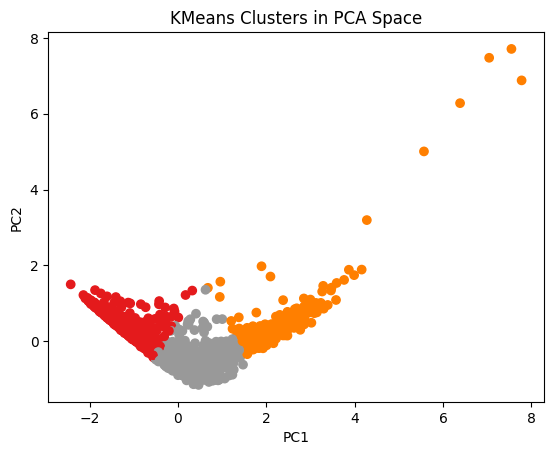

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
gap['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(gap['PC1'], gap['PC2'], c=gap['kmeans_cluster'], cmap='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters in PCA Space')
plt.show()

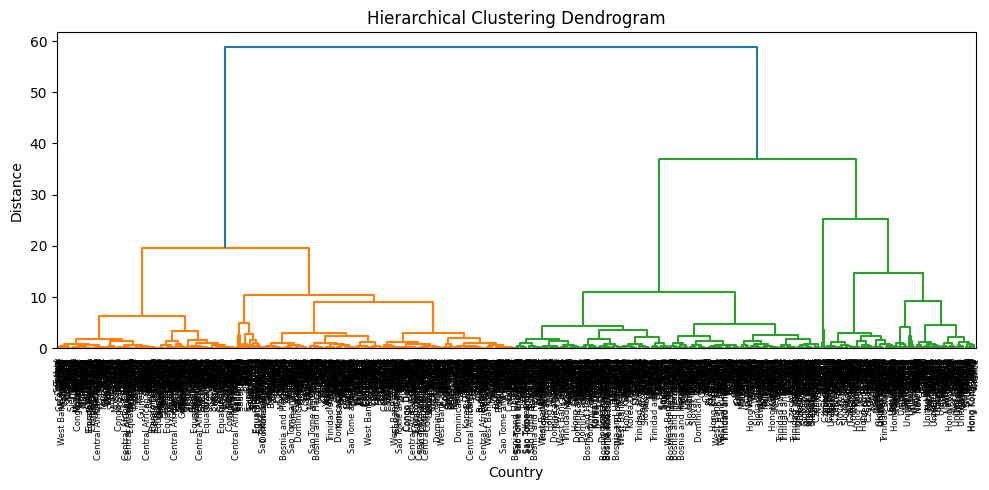

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=gap['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Subdivide by continent

Explained variance ratios (Asia): [0.76997236 0.23002764]
PCA components (Asia):
 [[ 0.34303822  0.93932145]
 [ 0.93932145 -0.34303822]]


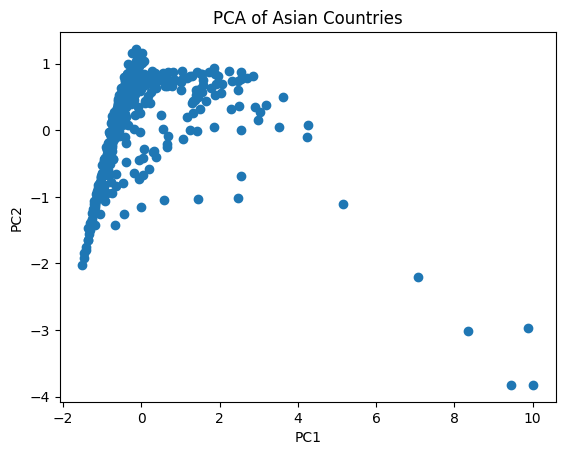

In [13]:
# Filter for Asian countries
asia_gap = gap[gap['continent'] == 'Asia'].copy()

# Select features and scale
X_asia = asia_gap[features]
X_asia_scaled = scaler.transform(X_asia)

# PCA for Asia
pca_asia = PCA(n_components=2)
X_asia_pca = pca_asia.fit_transform(X_asia_scaled)

print("Explained variance ratios (Asia):", pca_asia.explained_variance_ratio_)
print("PCA components (Asia):\n", pca_asia.components_)

asia_gap['PC1'] = X_asia_pca[:, 0]
asia_gap['PC2'] = X_asia_pca[:, 1]

# Plot PCA for Asia
plt.scatter(asia_gap['PC1'], asia_gap['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Asian Countries')
plt.show()

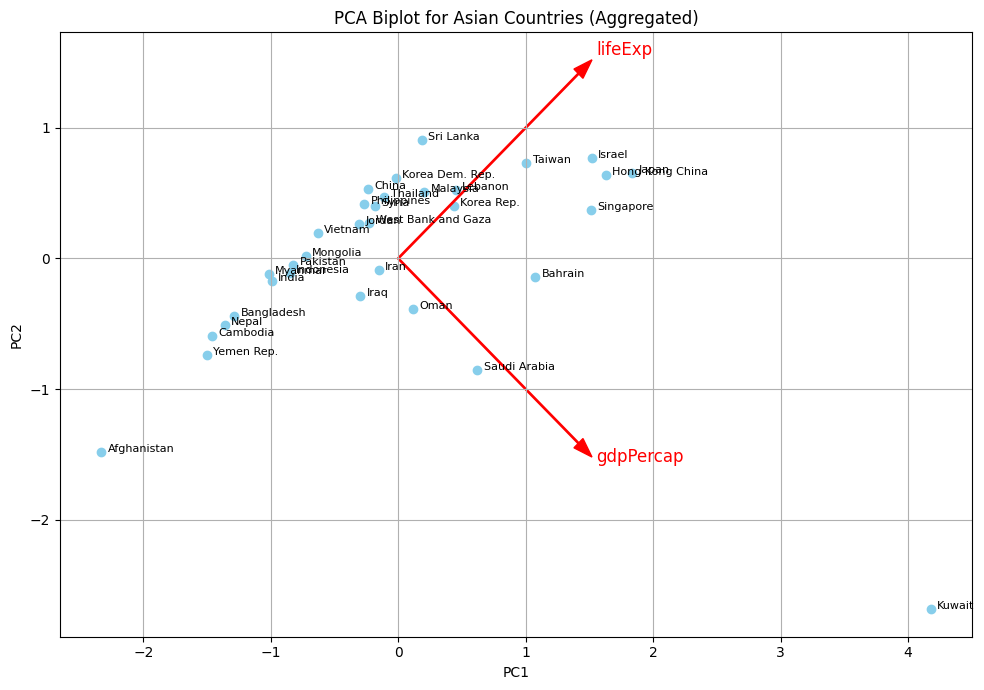

In [15]:
# Aggregate by country: mean of features for each Asian country
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()

# Standardize features
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])

# PCA
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]
asia_gap_unique['PC2'] = X_asia_pca_unique[:, 1]

plt.figure(figsize=(10, 7))

# Plot the PCA scores with country names
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['PC2'], color='skyblue')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.05, asia_gap_unique['PC2'].iloc[i], country, fontsize=8)

# Plot the feature vectors (biplot arrows)
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              pca_asia_unique.components_[0, i]*2,
              pca_asia_unique.components_[1, i]*2,
              color='r', width=0.01, head_width=0.1)
    plt.text(pca_asia_unique.components_[0, i]*2.2,
             pca_asia_unique.components_[1, i]*2.2,
             feature, color='r', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot for Asian Countries (Aggregated)')
plt.grid(True)
plt.tight_layout()
plt.show()

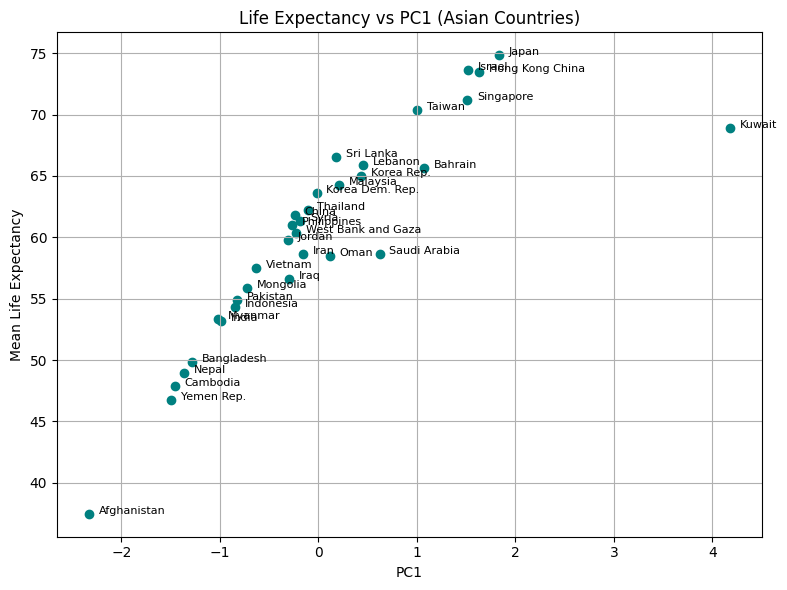

In [17]:
# If not already done, aggregate by country for Asia
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()

# Standardize features and perform PCA
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]

# Plot PC1 (x-axis) vs life expectancy (y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['lifeExp'], color='teal')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.1, asia_gap_unique['lifeExp'].iloc[i], country, fontsize=8)
plt.xlabel('PC1')
plt.ylabel('Mean Life Expectancy')
plt.title('Life Expectancy vs PC1 (Asian Countries)')
plt.grid(True)
plt.tight_layout()
plt.show()

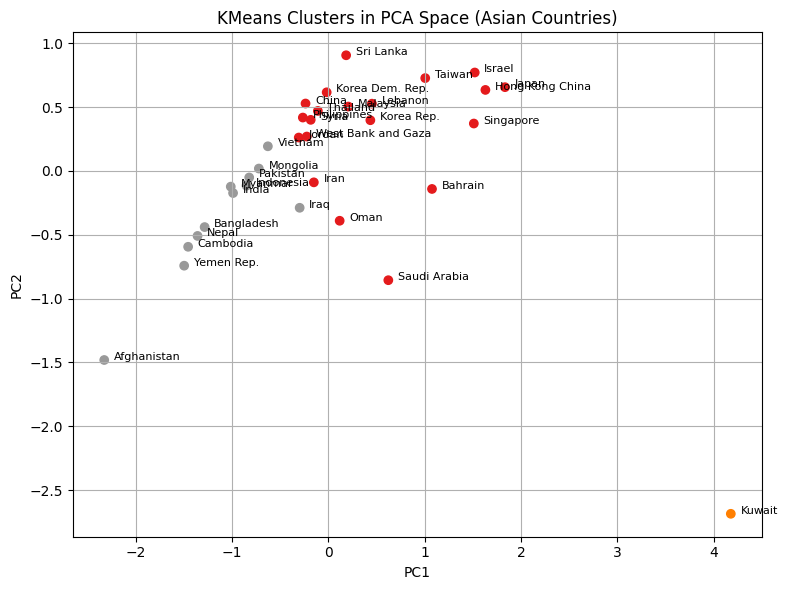

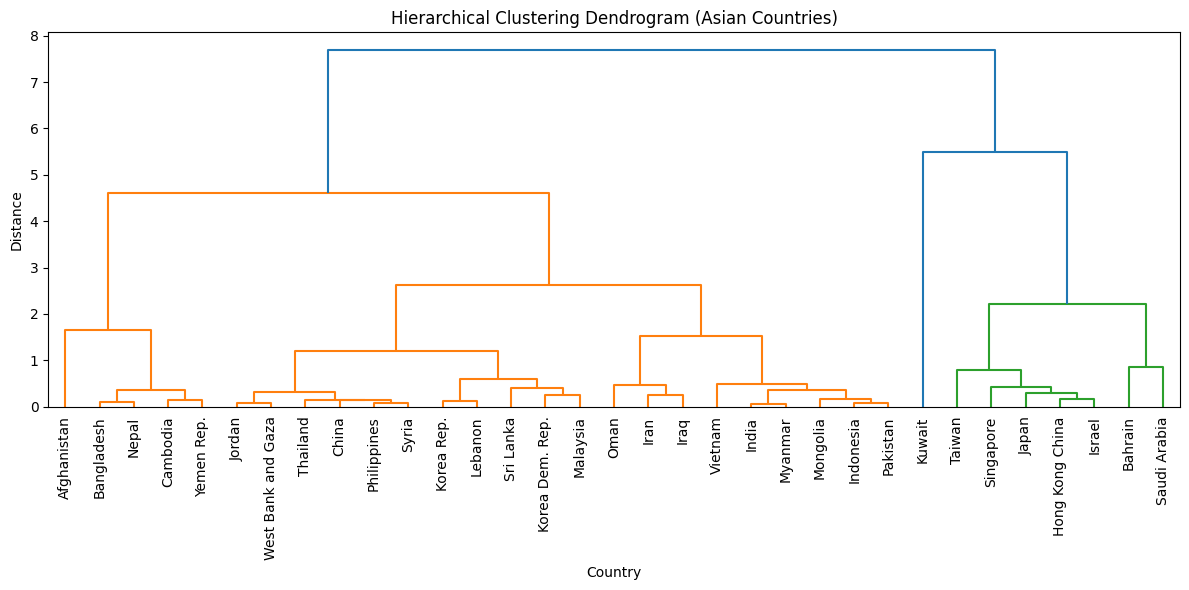

In [18]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Prepare data (if not already done) ---
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]
asia_gap_unique['PC2'] = X_asia_pca_unique[:, 1]

# --- KMeans clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
asia_gap_unique['kmeans_cluster'] = kmeans.fit_predict(X_asia_unique)

plt.figure(figsize=(8, 6))
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['PC2'], c=asia_gap_unique['kmeans_cluster'], cmap='Set1')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.1, asia_gap_unique['PC2'].iloc[i], country, fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters in PCA Space (Asian Countries)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Hierarchical clustering (dendrogram) ---
Z = linkage(X_asia_unique, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=asia_gap_unique['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Asian Countries)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

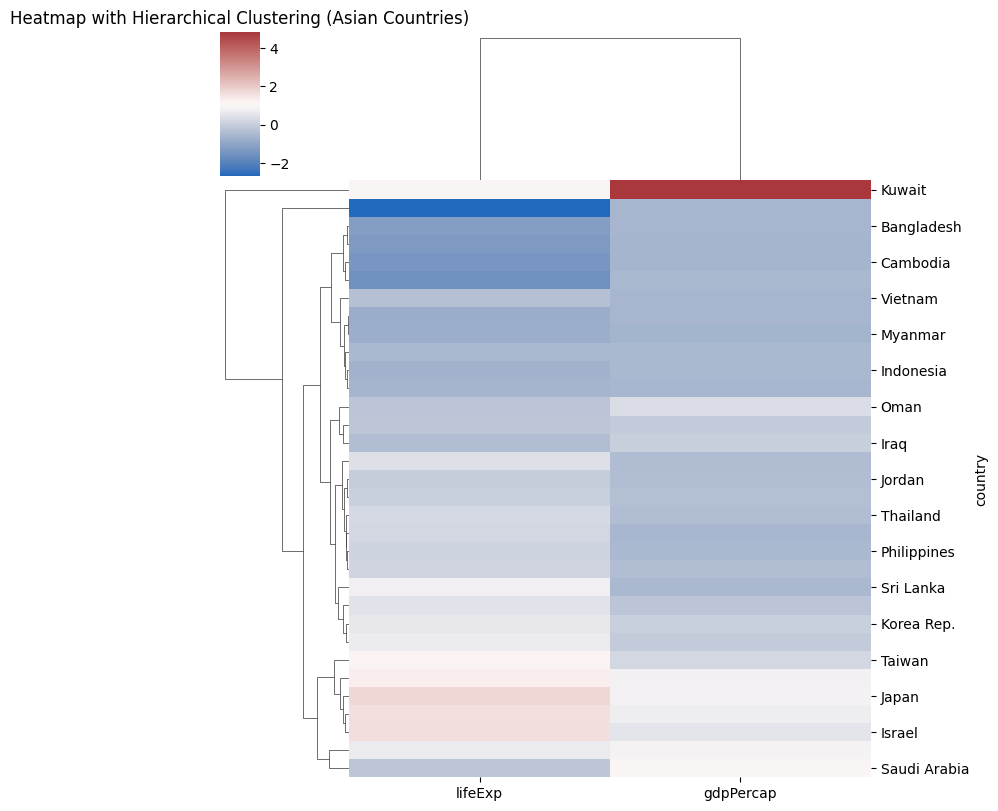

In [19]:
import seaborn as sns

# If not already done, aggregate and scale
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])

# Create a DataFrame for the heatmap
asia_heatmap_df = pd.DataFrame(X_asia_unique, index=asia_gap_unique['country'], columns=features)

# Plot heatmap with clustering
sns.clustermap(asia_heatmap_df, cmap='vlag', standard_scale=None, figsize=(8, 8))
plt.title('Heatmap with Hierarchical Clustering (Asian Countries)')
plt.show()